> Com o banco de dados do questionário você deve estimar alguns modelos para explicar a nota dos alunos em estatística 2. Você deve explicar porque escolheu as variáveis explicativas e qual o sinal esperado para elas. Depois você deve interpretar os resultados obtidos e o grau de ajuste das regressões. Escolha somente variáveis explicativas contínuas porque até agora não sabemos usar outros tipos de variáveis. ***Que tipo de problema pode surgir pela omissão da(s) variável(eis) que não  é (são) contínua(s)?***
> 
> Como estamos começando agora a estudar inferência, obviamente vocês não precisam se preocupar em verificar a significância estatística dos resultados.
> 
> O trabalho deve ter no máximo 3 páginas. ***A entrega será no até o dia 24/05/22 às 11hs***.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# plt.style.use(['science', 'latex-sans', 'grid'])
plt.style.use(['seaborn-paper'])
sns.color_palette("light:b", as_cmap=True)
# sns.set_style('white') # Modificar


# Steps

    # Demonstrar os dados de forma tabular
        # Tipo dos dados
        # Valores únicos
        # Valores faltantes
    # Fazer análise exploratória
        # Média, mediana e moda (com box plot)
        # Scatter plots, pair plot
        # Tabela de correlação das variáveis contínuas
        # Distribuição das variáveis contínuas (histogramas)
    # Regressão simples com uma variável
        # rodar e interpretar
    # Regressão múltipla com três variáveis
        # rodar
        # interpretar
        # verificar distribuição (média e variância) do erro

# https://seaborn.pydata.org/examples/anscombes_quartet.html
# https://seaborn.pydata.org/examples/faceted_histogram.html
# https://seaborn.pydata.org/examples/scatterplot_matrix.html

In [2]:
df = pd.read_csv('dados/dados_ex_empirico_1.csv')

df_normalized = df.copy(deep=True)

columns = ['nota1', 'nota2', 'fuvest']

for column in columns:
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())	

display(df.head())
display(df_normalized.head())

,genero,idade,nota1,nota2,fuvest,gosta_curso,frequencia,gosta_estudo,ensino_medio,trabalho,nasceu_sp,pretende_estudar
0,M,23,8.5,8.5,67.0,S,S,S,N,N,N,S
1,M,21,10.0,10.0,71.0,S,S,S,S,S,N,S
2,F,21,8.6,8.3,66.0,S,S,S,N,N,S,S
3,M,23,9.0,6.8,62.0,S,S,S,S,N,N,S
4,M,22,9.5,8.6,68.0,S,S,S,N,S,N,S


,genero,idade,nota1,nota2,fuvest,gosta_curso,frequencia,gosta_estudo,ensino_medio,trabalho,nasceu_sp,pretende_estudar
0,M,23,0.625,0.625,0.68750,S,S,S,N,N,N,S
1,M,21,1.000,1.000,0.81250,S,S,S,S,S,N,S
2,F,21,0.650,0.575,0.65625,S,S,S,N,N,S,S
3,M,23,0.750,0.200,0.53125,S,S,S,S,N,N,S
4,M,22,0.875,0.650,0.71875,S,S,S,N,S,N,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genero            45 non-null     object 
 1   idade             45 non-null     int64  
 2   nota1             45 non-null     float64
 3   nota2             45 non-null     float64
 4   fuvest            44 non-null     float64
 5   gosta_curso       45 non-null     object 
 6   frequencia        45 non-null     object 
 7   gosta_estudo      45 non-null     object 
 8   ensino_medio      45 non-null     object 
 9   trabalho          45 non-null     object 
 10  nasceu_sp         45 non-null     object 
 11  pretende_estudar  45 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 4.3+ KB


In [7]:
df.isna().sum()

genero              0
idade               0
nota1               0
nota2               0
fuvest              1
gosta_curso         0
frequencia          0
gosta_estudo        0
ensino_medio        0
trabalho            0
nasceu_sp           0
pretende_estudar    0
dtype: int64

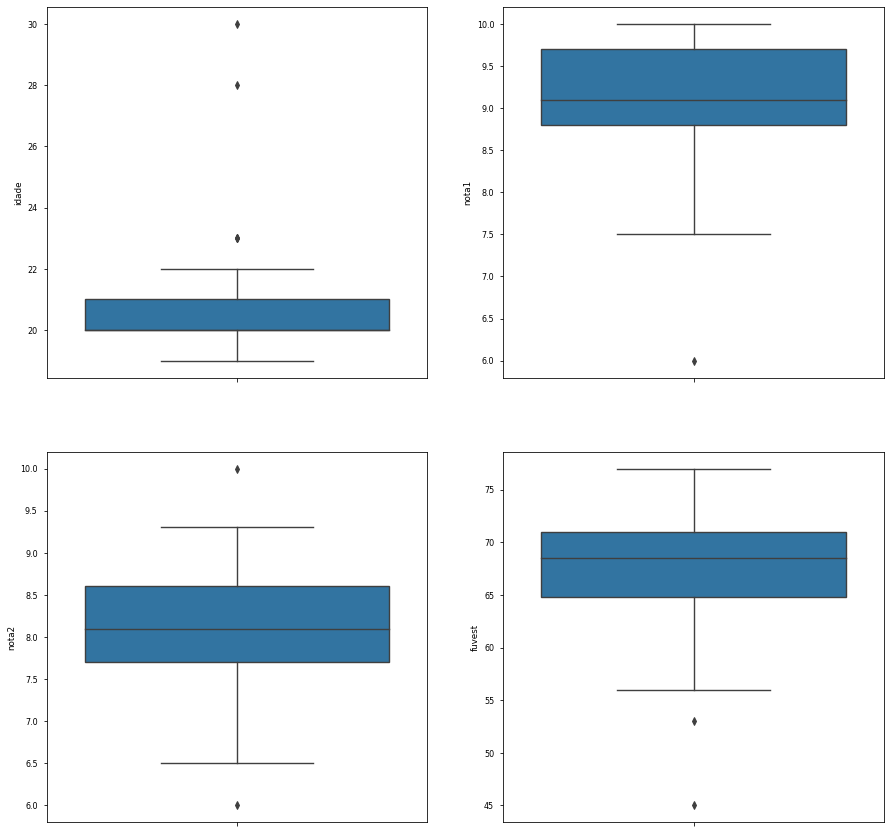

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(y='idade', data=df, ax=axes[0, 0])
sns.boxplot(y='nota1', data=df, ax=axes[0, 1])
sns.boxplot(y='nota2', data=df, ax=axes[1, 0])
sns.boxplot(y='fuvest', data=df, ax=axes[1, 1])

plt.show()

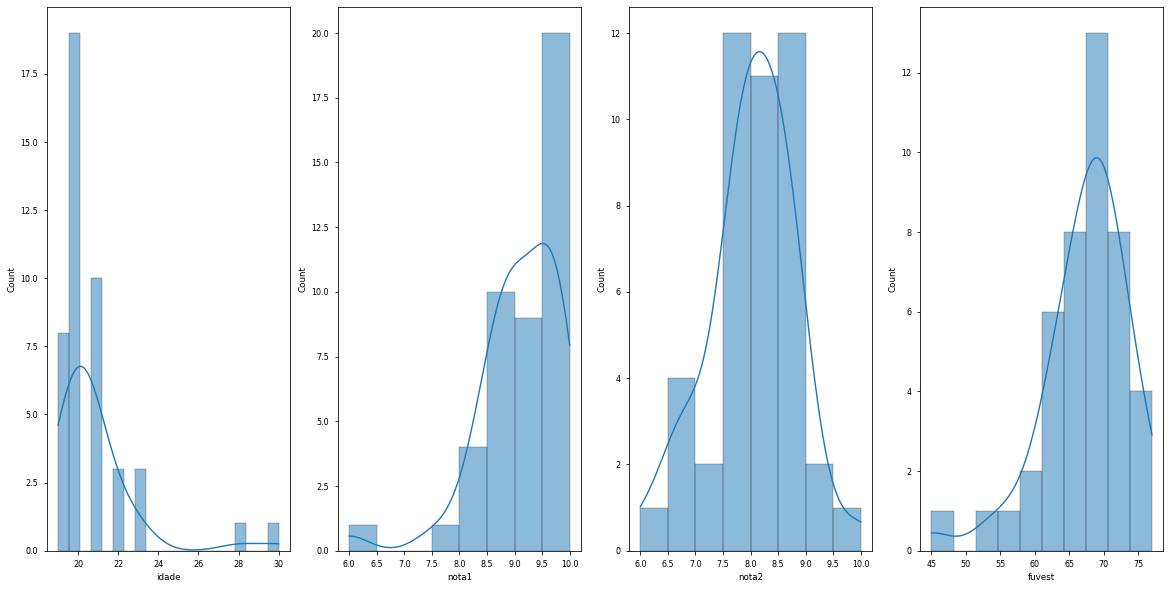

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

sns.histplot(df['idade'], kde=True, ax=axes[0])
sns.histplot(df['nota1'], kde=True, ax=axes[1])
sns.histplot(df['nota2'], kde=True, ax=axes[2])
sns.histplot(df['fuvest'], kde=True, ax=axes[3])

plt.show()

NameError: name 'con' is not defined

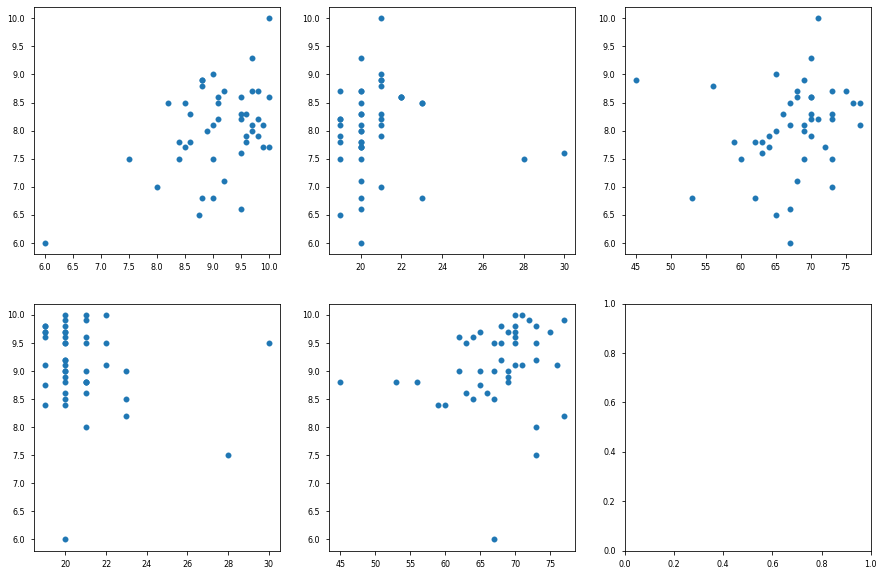

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].scatter(y=df['nota2'], x=df['nota1'])
axes[0, 1].scatter(y=df['nota2'], x=df['idade'])
axes[0, 2].scatter(y=df['nota2'], x=df['fuvest'])

axes[1, 0].scatter(y=df['nota1'], x=df['idade'])
axes[1, 1].scatter(y=df['nota1'], x=df['fuvest'])

stats.pearsonr(con['Strength'], con['FlyAsh'])

plt.show()

<AxesSubplot:>

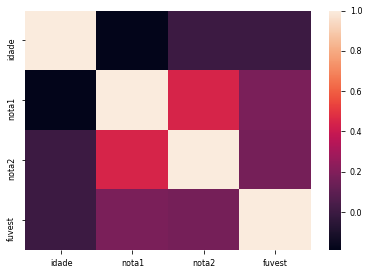

In [6]:
corr = df[['idade', 'nota1', 'nota2', 'fuvest']].corr()

sns.heatmap(corr)

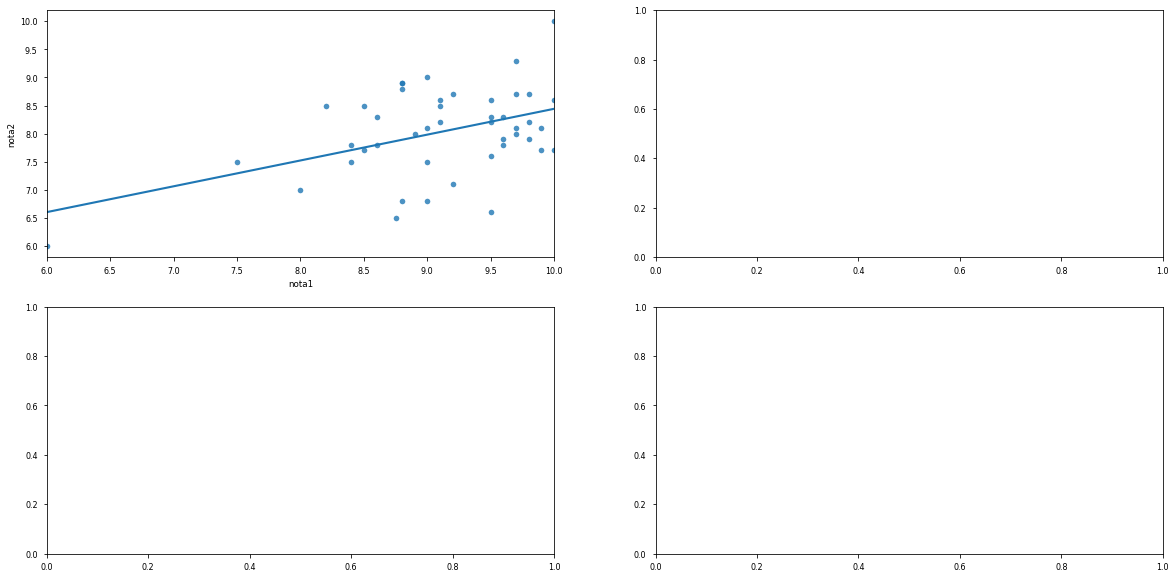

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.regplot(x='nota1', y='nota2', data=df, ci=None, ax=axes[0, 0])
# sns.regplot(x='fuvest', y='nota2', data=df, ci=None, ax=axes[1])
# sns.regplot(x='idade', y='nota2', data=df, ci=None, ax=axes[2])

# stats.pearsonr(con['Strength'], con['FlyAsh'])

plt.show()

In [7]:
X = df_normalized['nota1']
X = sm.add_constant(X)

Y = df_normalized['nota2']

model = sm.OLS(Y, X, missing='drop')
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  nota2   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     10.62
Date:                Mon, 23 May 2022   Prob (F-statistic):            0.00219
Time:                        19:26:35   Log-Likelihood:                 15.114
No. Observations:                  45   AIC:                            -26.23
Df Residuals:                      43   BIC:                            -22.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1507      0.113      1.339      0.1

Os resultados da regressão acima dizem que um ponto a mais na nota de Introdução à Probabilidade e Estatística I (MAE0219), leva a um aumento de $0.4599$ décimos na nota de Introdução à Probabilidade e Estatística II (MAE0229). Esse resultado faz sentido lógico, pois é esperado que alunos com mais base se saiam melhores nas matérias que presumem conhecimento prévio.

Entretanto, é necessário notar que o $R^2$ da regressão é de $0.179$, o que significa que o modelo especificado explica apenas 17% da varição da nota em MAE0229. De fato, houve a omissão de variáveis que podem impactar significativamente o grau de ajuste do modelo, tais como a idade dos alunos e o seu nível de preparação ao sair do ensino médio, medido aqui pela nota na Fuvest.

In [12]:
X = df_normalized[['nota1', 'fuvest']]
X = sm.add_constant(X)

Y = df_normalized['nota2']

model = sm.OLS(Y, X, missing='drop')
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  nota2   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     5.912
Date:                Mon, 23 May 2022   Prob (F-statistic):            0.00555
Time:                        19:29:39   Log-Likelihood:                 15.094
No. Observations:                  44   AIC:                            -24.19
Df Residuals:                      41   BIC:                            -18.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0846      0.139      0.611      0.5

In [13]:
X = df_normalized[['idade', 'nota1', 'fuvest']]
X = sm.add_constant(X)

Y = df_normalized['nota2']

model = sm.OLS(Y, X, missing='drop')
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  nota2   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     3.993
Date:                Mon, 23 May 2022   Prob (F-statistic):             0.0141
Time:                        19:29:43   Log-Likelihood:                 15.282
No. Observations:                  44   AIC:                            -22.56
Df Residuals:                      40   BIC:                            -15.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0859      0.322     -0.266      0.7

In [16]:
# https://scikit-learn.org/stable/modules/preprocessing.html#normalization
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
# https://stackoverflow.com/questions/49641707/standardize-some-columns-in-python-pandas-dataframe

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'sans',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']